In [14]:
'''数据清洗'''
import pandas as pd
import re
data=pd.read_csv("full_music_data.csv",encoding="utf-8")

In [27]:
id_count=[]#计算每一行有几个id
for i in range(0,data.shape[0]):
    multiple_id=data.iloc[i,1]
    pattern = re.compile(r'\d+')
    res = re.findall(pattern, multiple_id)
    count = len(res)
    id_count.append(count)
data['id_count']=id_count
data['id_count'].value_counts()

1     93930
2      3967
3       306
4        69
5        44
6        15
28        1
17        1
16        1
13        1
11        1
10        1
9         1
8         1
7         1
Name: id_count, dtype: int64

In [ ]:
'''处理单人唱的歌'''
single_data=data[data['id_count']==1]
new_id=[]
for i in range(0,single_data.shape[0]):
    single_id = single_data.iloc[i,1]
    pattern = re.compile(r'\d+')
    res = re.findall(pattern, single_id)
    single_id = res[0]
    new_id.append(single_id)
single_data['new_id']=new_id

In [70]:
multiple_data=data[data['id_count']!=1]
spilt=[]
for i in range(0,multiple_data.shape[0]):
    multiple_id = multiple_data.iloc[i,1]
    pattern = re.compile(r'\d+')
    res=re.findall(pattern,multiple_id)
    jubu_spilt=str(res[0])
    for j in range(1,len(res)):
        jubu_spilt=jubu_spilt+"|"+str(res[j])
    spilt.append(jubu_spilt)
multiple_data['spilt']=spilt
multiple_data.to_csv("TempData/temp08.csv",encoding="utf-8",index=False)

<ipython-input-70-48a87138db19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_data['spilt']=spilt


In [91]:
multiple_data=pd.read_csv("TempData/temp08.csv",encoding="utf-8")
tempdf=multiple_data['spilt'].str.split('|',expand=True).stack()
tempdf=tempdf.reset_index(level=1,drop=True).rename('new_id')
multiple_data=multiple_data.join(tempdf)

In [92]:
multiple_data=multiple_data.drop(columns=['spilt'])
print(list(multiple_data))
print(list(single_data))
multiple_data.to_csv("TempData/temp08.csv",encoding="utf-8",index=False)
single_data.to_csv("TempData/temp09.csv",encoding="utf-8",index=False)

['artist_names', 'artists_id', 'danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)', 'id_count', 'new_id']
['artist_names', 'artists_id', 'danceability', 'energy', 'valence', 'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)', 'id_count', 'new_id']


In [96]:
multiple_data=pd.read_csv("TempData/temp08.csv",encoding="utf-8")
single_data=pd.read_csv("TempData/temp09.csv",encoding="utf-8")
final_clean = pd.concat([single_data, multiple_data], axis=0)
print(final_clean.shape[0])
final_clean.to_csv("TempData/q3_cleaned_data.csv",encoding='utf-8',index=False)

103487


In [100]:
final_clean=pd.read_csv("TempData/q3_cleaned_data.csv",encoding="utf-8")
type_data=pd.read_csv("TempData/q2new_data.csv",encoding="utf-8")[['artist_id','type']]
new_data=pd.merge(final_clean,type_data,left_on='new_id',right_on='artist_id',how='inner')
new_data.to_csv("TempData/q3_cleaned_withtype_data.csv",encoding='utf-8',index=False)

In [104]:
import pandas as pd
time_origin=pd.read_csv("TempData/q3_Time_origin.csv",encoding='utf-8')
time_origin.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101645 entries, 0 to 101644
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   new_id            101645 non-null  int64  
 1   type              101645 non-null  int64  
 2   year              101645 non-null  int64  
 3   danceability      101645 non-null  float64
 4   energy            101645 non-null  float64
 5   valence           101645 non-null  float64
 6   tempo             101645 non-null  float64
 7   loudness          101645 non-null  float64
 8   acousticness      101645 non-null  float64
 9   instrumentalness  101645 non-null  float64
 10  speechiness       101645 non-null  float64
 11  duration_ms       101645 non-null  int64  
 12  popularity        101645 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 10.1 MB


In [125]:
group1=time_origin.groupby(['type'])
type_data={}
data=[]
for a,b in group1:
    print(a)
    group2=b.groupby(['year'])[['danceability','energy','valence','tempo','loudness','acousticness','instrumentalness','speechiness','duration_ms','popularity']].mean()
    group2.to_csv("TempData/Type_Year/type"+str(a)+".csv",encoding='utf-8',index=True)
    data.append(group2)
    type_data[str(a)]=group2
final_clean = pd.concat(data, axis=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [126]:
final_clean.to_csv("TempData/Type_Year/all.csv",encoding='utf-8',index=True)

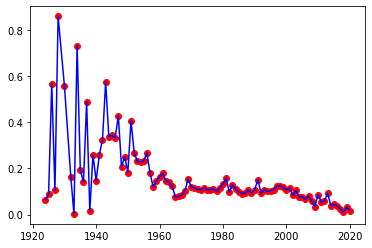

In [158]:
'''type1:就是派系1平均每年的变化情况'''
import matplotlib.pyplot as plt
plot_data1=pd.read_csv("TempData/Type_Year/type1.csv",encoding="utf-8")
x=plot_data1['year'].tolist()
y=plot_data1['instrumentalness'].tolist()
plt.plot(x,y,'b-')
plt.scatter(x,y,color='red')

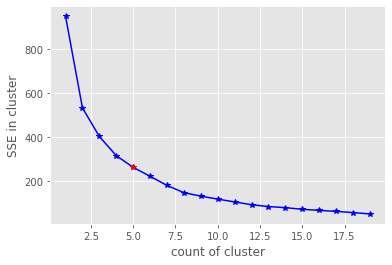

In [163]:
from sklearn.preprocessing import scale
import numpy as np
x=plot_data1.drop(columns=['year'])
x=scale(x)
A=x
from sklearn.cluster import KMeans
TSSE=[]
K=19
for k in range(1,K+1):
    SSE=[]
    md=KMeans(n_clusters=k)
    md.fit(A)
    labels=md.labels_
    centers=md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((A[labels==label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.figure(2)
plt.style.use('ggplot')
plt.plot(range(1,K+1),TSSE,'b*-')
plt.plot(5,TSSE[4],'r*')
plt.xlabel("count of cluster")
plt.ylabel("SSE in cluster")
plt.show()

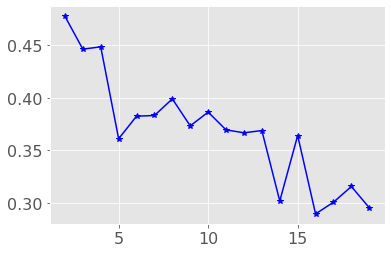

In [165]:
from sklearn import metrics
S=[]
X=A
for k in range(2,K+1):
    md=KMeans(k)
    md.fit(A)
    labels=md.labels_
    S.append(metrics.silhouette_score(X,labels,metric='euclidean'))
plt.rc('font',size=16)
plt.plot(range(2,K+1),S,'b*-')
